In [1]:
using DifferentialEquations
using Plots

In [18]:
function DDOL_2modules(du,u,p,t)

    v00,v10,v01,v11 = u
    bA,bB,n,umax,G,r,D,cA,cB,dA,dB = p
    v_populations = [ v00 , v10 , v01 , v11 ]
    total_pop = sum( v_populations )
    
    u_00 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB ) ^ n )
    u_10 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB ) ^ n )
    u_01 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB ) ^ n )
    u_11 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB ) ^ n )
    
    v00_growth = u_00 * v00 * ( 1.0 - ( total_pop / r ) ) - D * v00
    v10_growth = u_10 * v10 * ( 1.0 - ( total_pop / r ) ) - D * v10
    v01_growth = u_01 * v01 * ( 1.0 - ( total_pop / r ) ) - D * v01
    v11_growth = u_11 * v11 * ( 1.0 - ( total_pop / r ) ) - D * v11
    
    modA = cA * ( v10 + v11 )
    modB = cB * ( v01 + v11 )
    
    v00_conjugation = ( - ( modA * v00 ) + ( dA * v10 ) 
                        - ( modB * v00 ) + ( dB * v01 ) )
    v10_conjugation = ( + ( modA * v00 ) - ( dA * v10 )
                        - ( modB * v10 ) + ( dB * v11 ) )
    v01_conjugation = ( - ( modA * v01 ) + ( dA * v11 ) 
                        + ( modB * v00 ) - ( dB * v01 ) )  
    v11_conjugation = ( + ( modA * v01 ) - ( dA * v11 ) 
                        + ( modB * v10 ) - ( dB * v11 ) )

    du[1] = dv00 = v00_conjugation + v00_growth
    du[2] = dv10 = v10_conjugation + v10_growth
    du[3] = dv01 = v01_conjugation + v01_growth
    du[4] = dv11 = v11_conjugation + v11_growth
    
end

function DDOL_3modules(du,u,p,t)
    
    v000,v100,v010,v001,v110,v101,v011,v111 = u
    bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC = p
    v_populations = [ v000 , v100 , v010 , v001 , v110 , v101 , v011 , v111 ]
    total_pop = sum( v_populations )
    
    u_000 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 0 * bC ) ^ n )
    u_100 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 0 * bC ) ^ n )
    u_010 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 0 * bC ) ^ n )
    u_001 = ( umax * G ) / ( 1.0 + ( 0 * bA + 0 * bB + 1 * bC ) ^ n )
    u_110 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 0 * bC ) ^ n )
    u_101 = ( umax * G ) / ( 1.0 + ( 1 * bA + 0 * bB + 1 * bC ) ^ n )
    u_011 = ( umax * G ) / ( 1.0 + ( 0 * bA + 1 * bB + 1 * bC ) ^ n )
    u_111 = ( umax * G ) / ( 1.0 + ( 1 * bA + 1 * bB + 1 * bC ) ^ n )

    v000_growth = u_000 * v000 * ( 1.0 - ( total_pop / r ) ) - D * v000
    v100_growth = u_100 * v100 * ( 1.0 - ( total_pop / r ) ) - D * v100
    v010_growth = u_010 * v010 * ( 1.0 - ( total_pop / r ) ) - D * v010
    v001_growth = u_001 * v001 * ( 1.0 - ( total_pop / r ) ) - D * v001
    v110_growth = u_110 * v110 * ( 1.0 - ( total_pop / r ) ) - D * v110
    v101_growth = u_101 * v101 * ( 1.0 - ( total_pop / r ) ) - D * v101
    v011_growth = u_011 * v011 * ( 1.0 - ( total_pop / r ) ) - D * v011
    v111_growth = u_111 * v111 * ( 1.0 - ( total_pop / r ) ) - D * v111   
    
    modA = cA * ( v100 + v110 + v101 + v111)
    modB = cB * ( v010 + v110 + v011 + v111)
    modC = cC * ( v001 + v011 + v101 + v111)
    
    v000_conjugation = ( - ( modA * v000 ) + ( dA * v100 )  
                         - ( modB * v000 ) + ( dB * v010 )  
                         - ( modC * v000 ) + ( dC * v001 ) )
    v100_conjugation = ( + ( modA * v000 ) - ( dA * v100 )  
                         - ( modB * v100 ) + ( dB * v110 )  
                         - ( modC * v100 ) + ( dC * v101 ) )
    v010_conjugation = ( - ( modA * v010 ) + ( dA * v110 )  
                         + ( modB * v000 ) - ( dB * v010 )  
                         - ( modC * v010 ) + ( dC * v011 ) )
    v001_conjugation = ( - ( modA * v001 ) + ( dA * v101 )  
                         - ( modB * v001 ) + ( dB * v011 )  
                         + ( modC * v000 ) - ( dC * v001 ) )
    v110_conjugation = ( + ( modA * v010 ) - ( dA * v110 )  
                         + ( modB * v100 ) - ( dB * v110 )  
                         - ( modC * v110 ) + ( dC * v111 ) )
    v101_conjugation = ( + ( modA * v001 ) - ( dA * v101 )  
                         - ( modB * v101 ) + ( dB * v111 )  
                         + ( modC * v100 ) - ( dC * v101 ) )
    v011_conjugation = ( - ( modA * v011 ) + ( dA * v111 )  
                         + ( modB * v001 ) - ( dB * v011 )  
                         + ( modC * v010 ) - ( dC * v011 ) )
    v111_conjugation = ( + ( modA * v011 ) - ( dA * v111 )  
                         + ( modB * v101 ) - ( dB * v111 )  
                         + ( modC * v110 ) - ( dC * v111 ) )
    
    du[1] = dv000 = v000_conjugation + v000_growth
    du[2] = dv100 = v100_conjugation + v100_growth
    du[3] = dv010 = v010_conjugation + v010_growth
    du[4] = dv001 = v001_conjugation + v001_growth
    du[5] = dv110 = v110_conjugation + v110_growth
    du[6] = dv101 = v101_conjugation + v101_growth
    du[7] = dv011 = v011_conjugation + v011_growth
    du[8] = dv111 = v111_conjugation + v111_growth
    
end

DDOL_3modules (generic function with 1 method)

In [4]:
c_range = 0:0.002:0.1
avg_c = 0.1
transfer_rates = [0.03,0.04,0.05,0.06,0.07,0.08,0.09]

avg_umax = 1

D_range = 0:0.001:0.1
avg_D = 0.02

dilution_rates = [0,0.01,0.02,0.03,0.04,0.05,0.06,0.07]

d_range = 0:0.001:1
avg_d = 1e-3

b_range = 0:0.1:15
avg_b = 1

n_range = 1:0.01:10
avg_n = 3

G_range = 0:0.01:1
avg_G = 1

avg_r = 1

simulation_time = 1000

1000

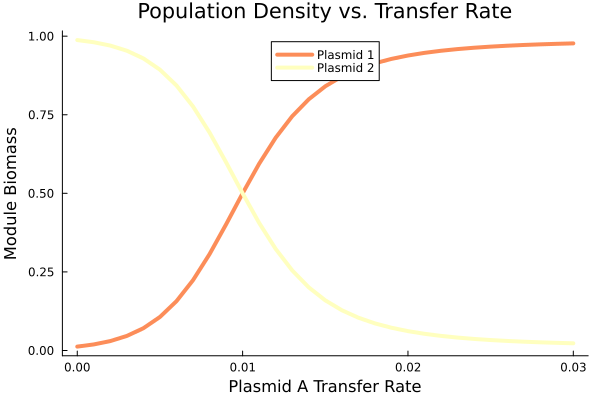

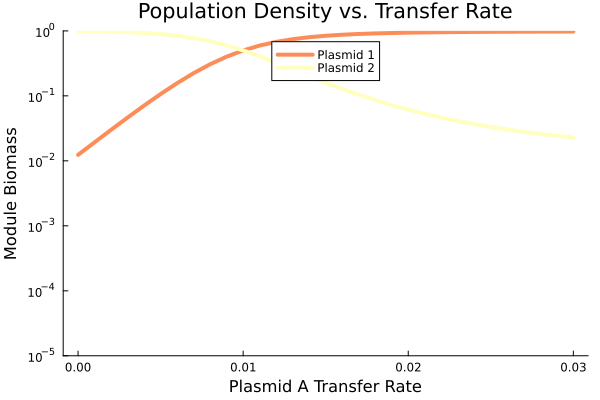

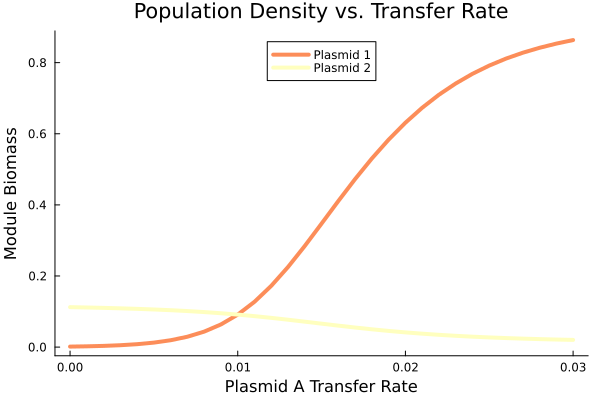

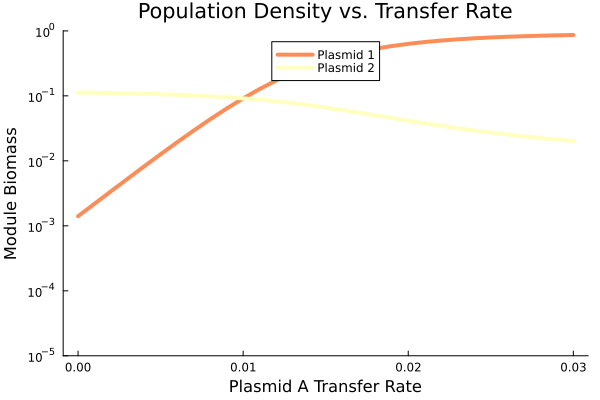

In [55]:
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
n = 3
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D

dA = avg_d
dB = avg_d

cB = 0.01

bA = 1
bB = 1


transfer_rate_range = 0:0.001:0.03

dilution_rates = dilution_rates

simulation_time = 1000

time = simulation_time # simulated time IN HOURS
dP = 0.5 # maximum growth rate per hour (non-dimensionalization term)
tspan_end = time * dP



steady_state_solutions = Array{Float64}(undef,2,length(transfer_rate_range))

    
for transfer_index in range(1,length(transfer_rate_range))
    
    cA = transfer_rate_range[transfer_index]
    
    # Initial conditions and parameter values

    # u = [v000,v100,v010, v001, v110,v101,v011, v111]
    u0 = [0.0,1e-3,1e-3,0.0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA,bB,n,umax,G,r,D,cA,cB,dA,dB]

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_2modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    module_A = sol[2, :]/r + sol[4, :]/r
    module_B = sol[3, :]/r + sol[4, :]/r


    module_A_SS = max(0,last(module_A))
    module_B_SS = max(0,last(module_B))

    total_SS = module_A_SS + module_B_SS
    relative_A = module_A_SS / total_SS
    relative_B = module_B_SS / total_SS


    steady_state_solutions[1,transfer_index] = relative_A
    steady_state_solutions[2,transfer_index] = relative_B
end


# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_3, linewidth=4)

comparison_plot = plot()
xlabel!("Plasmid A Transfer Rate")
ylabel!("Module Biomass")
title!("Population Density vs. Transfer Rate")
plot!(legend=:top)
plot!(grid=:false)

for index in range(1,2)
    
    
    plot!(transfer_rate_range, steady_state_solutions[index,:],label="Plasmid $index")

end


display(comparison_plot)

#savefig(comparison_plot,"fractionVStransfer.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))

display(comparison_plot)

steady_state_solutions = Array{Float64}(undef,2,length(transfer_rate_range))

    
for transfer_index in range(1,length(transfer_rate_range))
    
    cA = transfer_rate_range[transfer_index]
    
    # Initial conditions and parameter values

    # u = [v000,v100,v010, v001, v110,v101,v011, v111]
    u0 = [0.0,1e-3,1e-3,0.0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA,bB,n,umax,G,r,D,cA,cB,dA,dB]

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_2modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    module_A = sol[2, :]/r + sol[4, :]/r
    module_B = sol[3, :]/r + sol[4, :]/r


    module_A_SS = max(0,last(module_A))
    module_B_SS = max(0,last(module_B))


    steady_state_solutions[1,transfer_index] = module_A_SS
    steady_state_solutions[2,transfer_index] = module_B_SS
end


# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_3, linewidth=4)

comparison_plot = plot()
xlabel!("Plasmid A Transfer Rate")
ylabel!("Module Biomass")
title!("Population Density vs. Transfer Rate")
plot!(legend=:top)
plot!(grid=:false)

for index in range(1,2)
    
    
    plot!(transfer_rate_range, steady_state_solutions[index,:],label="Plasmid $index")

end


display(comparison_plot)

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))

display(comparison_plot)

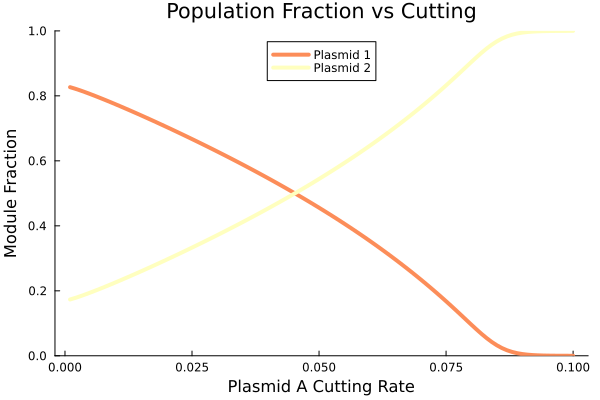

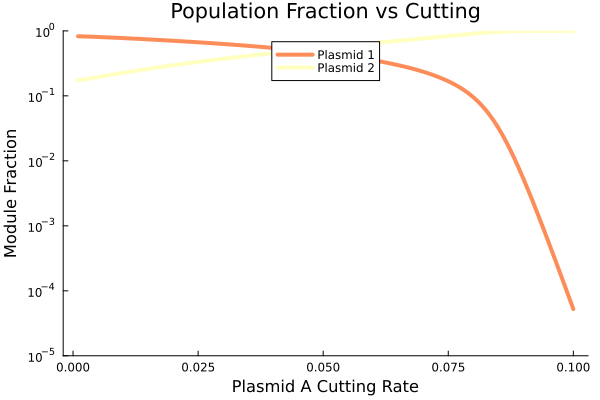

In [54]:
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
n = 3
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D


dB = avg_d

cA = 0.1
cB = 0.02

bA = 1
bB = 1


cutting_range = 0.001:0.001:0.1


simulation_time = 1000

time = simulation_time # simulated time IN HOURS
dP = 0.5 # maximum growth rate per hour (non-dimensionalization term)
tspan_end = time * dP



steady_state_solutions = Array{Float64}(undef,2,length(cutting_range))

    
for cutting_index in range(1,length(cutting_range))
    
    dA = cutting_range[cutting_index]
    
    # Initial conditions and parameter values

    # u = [v000,v100,v010, v001, v110,v101,v011, v111]
    u0 = [0.0,1e-3,1e-3,0.0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA,bB,n,umax,G,r,D,cA,cB,dA,dB]

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_2modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    module_A = sol[2, :]/r + sol[4, :]/r
    module_B = sol[3, :]/r + sol[4, :]/r


    module_A_SS = max(0,last(module_A))
    module_B_SS = max(0,last(module_B))

    total_SS = module_A_SS + module_B_SS
    relative_A = module_A_SS / total_SS
    relative_B = module_B_SS / total_SS


    steady_state_solutions[1,cutting_index] = relative_A
    steady_state_solutions[2,cutting_index] = relative_B
end


# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_3, linewidth=4)

comparison_plot = plot()
xlabel!("Plasmid A Cutting Rate")
ylabel!("Module Fraction")
title!("Population Fraction vs Cutting")
plot!(legend=:top)
plot!(grid=:false)

for index in range(1,2)
    
    
    plot!(cutting_range, steady_state_solutions[index,:],label="Plasmid $index")

end

plot!(ylim=(0,1))
display(comparison_plot)

#savefig(comparison_plot,"fractionVScutting.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))

display(comparison_plot)

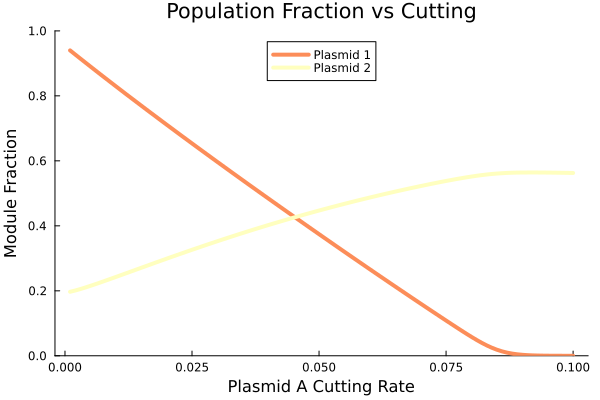

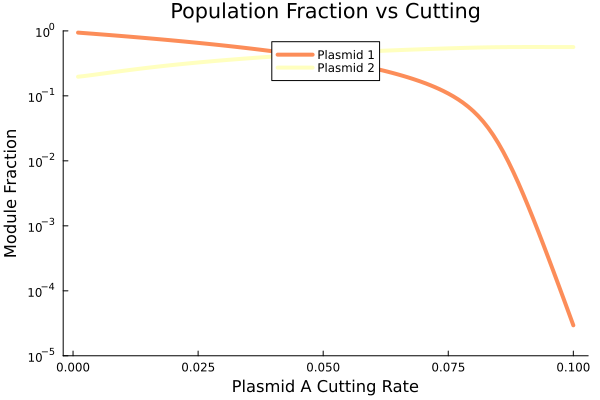

In [49]:
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
n = 3
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D


dB = avg_d

cA = 0.1
cB = 0.02

bA = 1
bB = 1


cutting_range = 0.001:0.001:0.1


simulation_time = 1000

time = simulation_time # simulated time IN HOURS
dP = 0.5 # maximum growth rate per hour (non-dimensionalization term)
tspan_end = time * dP



steady_state_solutions = Array{Float64}(undef,2,length(cutting_range))

    
for cutting_index in range(1,length(cutting_range))
    
    dA = cutting_range[cutting_index]
    
    # Initial conditions and parameter values

    # u = [v000,v100,v010, v001, v110,v101,v011, v111]
    u0 = [0.0,1e-3,1e-3,0.0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA,bB,n,umax,G,r,D,cA,cB,dA,dB]

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_2modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    module_A = sol[2, :]/r + sol[4, :]/r
    module_B = sol[3, :]/r + sol[4, :]/r


    module_A_SS = max(0,last(module_A))
    module_B_SS = max(0,last(module_B))

    total_SS = module_A_SS + module_B_SS
    relative_A = module_A_SS / total_SS
    relative_B = module_B_SS / total_SS


    steady_state_solutions[1,cutting_index] = module_A_SS
    steady_state_solutions[2,cutting_index] = module_B_SS
end


# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_3, linewidth=4)

comparison_plot = plot()
xlabel!("Plasmid A Cutting Rate")
ylabel!("Module Fraction")
title!("Population Fraction vs Cutting")
plot!(legend=:top)
plot!(grid=:false)

for index in range(1,2)
    
    
    plot!(cutting_range, steady_state_solutions[index,:],label="Plasmid $index")

end

plot!(ylim=(0,1))
display(comparison_plot)

#savefig(comparison_plot,"densityVStransfer.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))

display(comparison_plot)

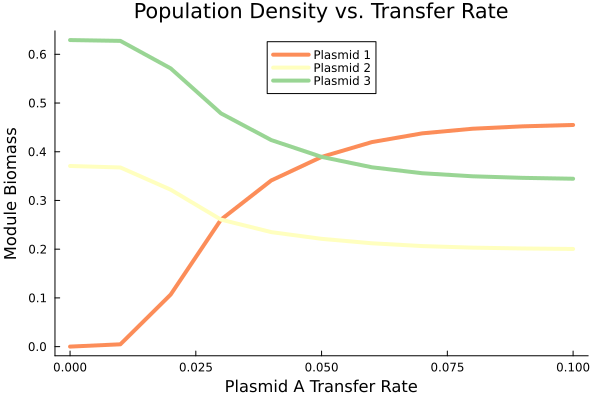

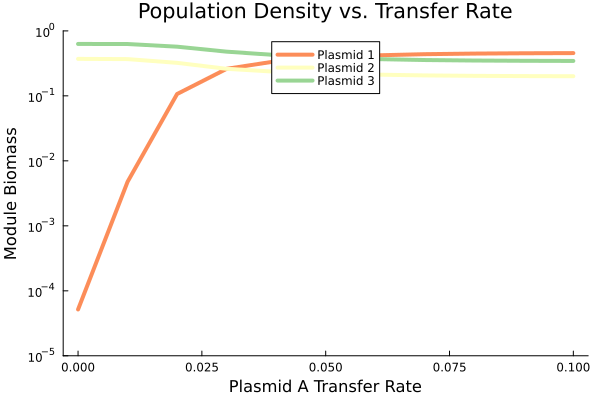

In [15]:
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
n = 3
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D

dA = avg_d
dB = avg_d
dC = avg_d

cB = 0.03
cC = 0.05

bA = 1
bB = 1
bC = 1

transfer_rate_range = 0:0.01:0.1

dilution_rates = dilution_rates

simulation_time = 1000

time = simulation_time # simulated time IN HOURS
dP = 0.5 # maximum growth rate per hour (non-dimensionalization term)
tspan_end = time * dP



steady_state_solutions = Array{Float64}(undef,3,length(transfer_rate_range))

    
for transfer_index in range(1,length(transfer_rate_range))
    
    cA = transfer_rate_range[transfer_index]
    
    # Initial conditions and parameter values

    # u = [v000,v100,v010, v001, v110,v101,v011, v111]
    u0 = [0.0,1e-3,1e-3,1e-3,0.0,0.0,0.0,0.0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC]

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_3modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    module_A = sol[2, :]/r + sol[5, :]/r + sol[6, :]/r + sol[8, :]/r
    module_B = sol[3, :]/r + sol[5, :]/r + sol[7, :]/r + sol[8, :]/r
    module_C = sol[4, :]/r + sol[6, :]/r + sol[7, :]/r + sol[8, :]/r


    module_A_SS = max(0,last(module_A))
    module_B_SS = max(0,last(module_B))
    module_C_SS = max(0,last(module_C))

    total_SS = module_A_SS + module_B_SS + module_C_SS
    relative_A = module_A_SS / total_SS
    relative_B = module_B_SS / total_SS
    relative_C = module_C_SS / total_SS


    steady_state_solutions[1,transfer_index] = relative_A
    steady_state_solutions[2,transfer_index] = relative_B
    steady_state_solutions[3,transfer_index] = relative_C
end


# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_3, linewidth=4)

comparison_plot = plot()
xlabel!("Plasmid A Transfer Rate")
ylabel!("Module Biomass")
title!("Population Density vs. Transfer Rate")
plot!(legend=:top)
plot!(grid=:false)

for index in range(1,3)
    
    
    plot!(transfer_rate_range, steady_state_solutions[index,:],label="Plasmid $index")

end


display(comparison_plot)

#savefig(comparison_plot,"densityVStransfer.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))

display(comparison_plot)

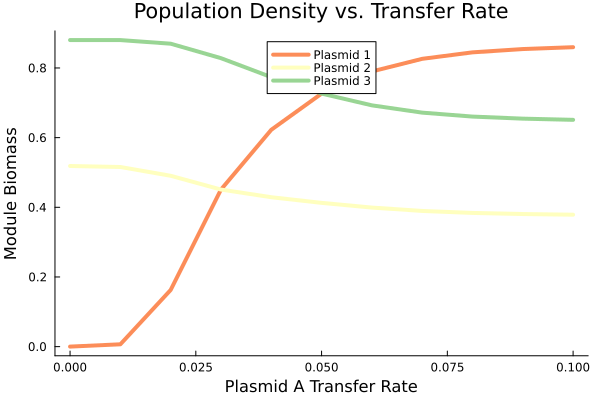

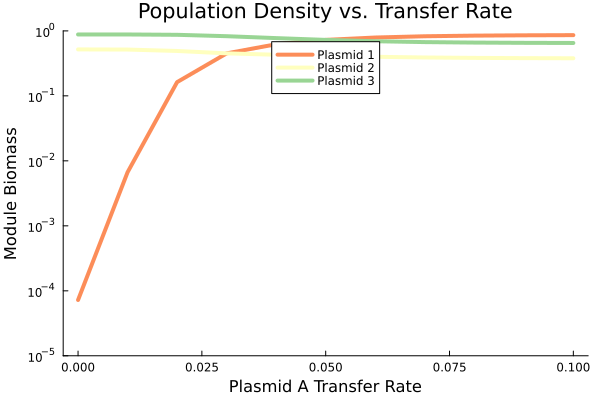

In [16]:
steady_state_solutions = Array{Float64}(undef,3,length(transfer_rate_range))

    
for transfer_index in range(1,length(transfer_rate_range))
    
    cA = transfer_rate_range[transfer_index]
    
    # Initial conditions and parameter values

    # u = [v000,v100,v010, v001, v110,v101,v011, v111]
    u0 = [0.0,1e-3,1e-3,1e-3,0.0,0.0,0.0,0.0] # Initial values for S0, S1, S2, S3

    # p = (bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC)
    p = [  bA,bB,bC,n,umax,G,r,D,cA,cB,cC,dA,dB,dC]

    # Time span for integration
    tspan = (0.0, tspan_end)  # Start and end times for integration

    # Define the ODE problem
    prob = ODEProblem(DDOL_3modules, u0, tspan, p)

    # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
    solver = Tsit5()

    # Solve the ODE problem
    sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

    module_A = sol[2, :]/r + sol[5, :]/r + sol[6, :]/r + sol[8, :]/r
    module_B = sol[3, :]/r + sol[5, :]/r + sol[7, :]/r + sol[8, :]/r
    module_C = sol[4, :]/r + sol[6, :]/r + sol[7, :]/r + sol[8, :]/r


    module_A_SS = max(0,last(module_A))
    module_B_SS = max(0,last(module_B))
    module_C_SS = max(0,last(module_C))


    steady_state_solutions[1,transfer_index] = module_A_SS
    steady_state_solutions[2,transfer_index] = module_B_SS
    steady_state_solutions[3,transfer_index] = module_C_SS
end


# Create the publication-quality plot using native Julia plotting
gr(color_palette=:Spectral_3, linewidth=4)

comparison_plot = plot()
xlabel!("Plasmid A Transfer Rate")
ylabel!("Module Biomass")
title!("Population Density vs. Transfer Rate")
plot!(legend=:top)
plot!(grid=:false)

for index in range(1,3)
    
    
    plot!(transfer_rate_range, steady_state_solutions[index,:],label="Plasmid $index")

end


display(comparison_plot)

#savefig(comparison_plot,"densityVStransfer.svg")

plot!(yaxis=:log)
plot!(ylim=(1e-5,1))

display(comparison_plot)

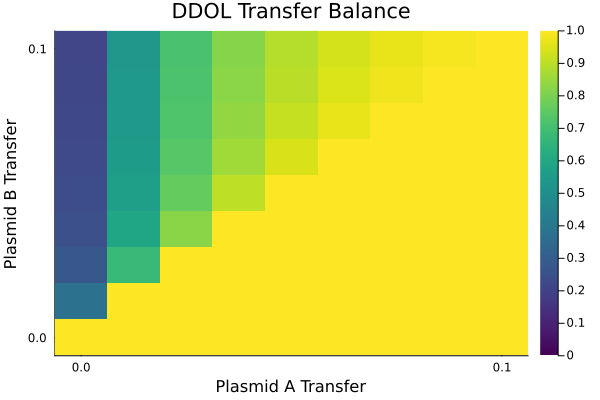

In [28]:
# p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
n = avg_n
umax = avg_umax
G = avg_G
r = avg_r
D = avg_D

bA = 1
bB = 1
dA = avg_d
dB = avg_d

transfer_range = 0.02:0.01:0.1

time = simulation_time # simulated time IN HOURS
dP = 0.5 # Turnover rate of final product (non-dimensionalization term)
tspan_end = time * dP


steady_state_solutions = Array{Float64}(undef,length(transfer_range),length(transfer_range))


for transfer_A_index in range(1,length(transfer_range))
    
    module_A_transfer = transfer_range[transfer_A_index]
    
    for transfer_B_index in range(1,length(transfer_range))
        
        module_B_transfer = transfer_range[transfer_B_index]
        
        # Initial conditions and parameter values

        # u = [v00,v10, v01, v11]
        u0 = [0.0,1e-3,1e-3,0.0000] # Initial values for S0, S1, S2, S3

        # p = (bA, bB, n,  umax,G,  r,    D,   cA,  cB,  dA,   dB)
        p = [  bA,bB,n,umax,G,r,D,module_A_transfer,module_B_transfer,dA,dB] # Parameters: bA,bB,n,umax,G,r,D,cA,cB,dA,dB

        # Time span for integration
        tspan = (0.0, tspan_end)  # Start and end times for integration

        # Define the ODE problem
        prob = ODEProblem(DDOL_2modules, u0, tspan, p)

        # Choose a solver (e.g., `Tsit5()` - an efficient low-order adaptive Runge-Kutta method)
        solver = Tsit5()

        # Solve the ODE problem
        sol = solve(prob, solver, saveat=1);  # Here, we specify `saveat` for regular time intervals.

        module_A = sol[2, :]/r + sol[4, :]/r
        module_B = sol[3, :]/r + sol[4, :]/r

        module_A_SS = max(0,last(module_A))
        module_B_SS = max(0,last(module_B))
        ratio = module_A_SS / module_B_SS


        steady_state_solutions[transfer_B_index,transfer_A_index] = ratio

    end
end

axismax = length(transfer_range)
axismax_value = last(transfer_range)

asymmetric_transfer_heatmap = heatmap(steady_state_solutions, c=:viridis, axis=false, colorbar=true, title="DDOL Transfer Balance")

heatmap!(axis=true,            # Show axis
clim=(0.0, 1.0),  # Set z-axis limits
xticks=([1,axismax],[0,axismax_value]), # Set tick positions for x-axis
yticks=([1,axismax],[0,axismax_value]), # Set tick positions for y-axis
xlabel="Plasmid A Transfer",
ylabel="Plasmid B Transfer")

#savefig(asymmetric_transfer_heatmap,"DDOL.svg")
display(asymmetric_transfer_heatmap)